In [1]:
# !pip uninstall tensorflow

In [2]:
!pip install tensorflow==2.0.0
!pip install tf-nightly

Processing /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd/gast-0.2.2-cp36-none-any.whl
ERROR: tf-nightly 2.3.0.dev20200617 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Using cached https://files.pythonhosted.org/packages/d6/84/759f5dd23fec8ba71952d97bcc7e2c9d7d63bdc582421f3cd4be845f0c98/gast-0.3.3-py2.py3-none-any.whl
ERROR: tensorflow 2.0.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
stop = stopwords.words('english')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
dataset = pd.read_csv('sms_data.csv',encoding = "cp1252")

In [5]:
dataset.head(5)

,Label,Message
0,Delivery,"Dear Guest, Thanks for choosing The Edison. Or..."
1,Hotel,Welcome to Southern University at Shreveport R...
2,Payment,Bill dated 2013-01-14 for Rs 626 has been gene...
3,Payment,Bill dated 2014-11-30 for Rs 323 has been gene...
4,Appointment,"DEAR Zachary, THANK YOU FOR YOUR BOOKING (ORDE..."


In [6]:
dataset["Label"]

0           Delivery
1              Hotel
2            Payment
3            Payment
4        Appointment
            ...     
12994           spam
12995           info
12996           info
12997           spam
12998           info
Name: Label, Length: 12999, dtype: object

In [7]:
# from sklearn.utils import shuffle
# dataset = shuffle(dataset)
# dataset.reset_index(drop=True)
# dataset.head
# dataset = pd.DataFrame(columns=['Label','Message'])
# labels = []
# Messages = []

# for i in range(0 ,15000):
#   labels.append(dataset1["Label"][i])
#   Messages.append(dataset1["Message"][i])

In [8]:
# dataset["Label"] = labels
# dataset["Message"] = Messages

In [9]:
for i in range(len(dataset)):
  if dataset["Label"][i] == 'Payment':
    dataset["Label"][i] = "financial"
  elif dataset["Label"][i] == "PickUp":
    dataset["Label"][i] = "financial"
  elif dataset["Label"][i] == "Train":
    dataset["Label"][i] = "financial"
  elif dataset["Label"][i] == "bank":
    dataset["Label"][i] = "financial"
  elif dataset["Label"][i] == "financial":
    dataset["Label"][i] = "financial"
  elif dataset["Label"][i] == "Expiry" :
    dataset["Label"][i] = "financial"
  else:
    dataset["Label"][i] = "nonfinancial"

In [10]:
dataset.tail(15)

,Label,Message
12984,nonfinancial,Delivered: Your package with Introductory Offe...
12985,nonfinancial,* KSRTC m-Ticket * from: MANTRALAYA to: KIAL ...
12986,nonfinancial,Delivered: Your package withNikon AF-S DX Nikk...
12987,nonfinancial,"Greetings, IDBI Bank wishes you a Happy Ganesh..."
12988,nonfinancial,"[Mini Kalzone] Hi Edwin, your reservation is c..."
12989,nonfinancial,"Dear INDIGO Customer, flight 5F212 from WGC sh..."
12990,financial,Bill dated 2011-03-19 for Rs 304 has been gene...
12991,nonfinancial,to discuss about project
12992,nonfinancial,"IM-PLOANS, 30/06/2016, HDFC BANK PERSONAL LOAN..."
12993,financial,OTP is 545125 for the txn of INR 14189.00 at J...


In [11]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "cause": "because", "could've": "could have","this's" : "this is"}

In [12]:
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
  def replace(match):
    return contractions[match.group(0)]
  return contractions_re.sub(replace, text)

In [13]:
for msg in dataset["Message"] :
  replace_contractions(msg)

In [14]:
def clean_data(x):
  punctuation = '.!"#$%&()*+-/:,;<=>?@[\\]^_`{|}~'
  x = x.apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
  x = x.str.lower()
  x = x.str.replace("[0-9]", " ")
  x = x.apply(lambda x: ' '.join(x.split()))
  return x

In [15]:
cleaned = clean_data(dataset["Message"])
dataset["Message"]

0        Dear Guest, Thanks for choosing The Edison. Or...
1        Welcome to Southern University at Shreveport R...
2        Bill dated 2013-01-14 for Rs 626 has been gene...
3        Bill dated 2014-11-30 for Rs 323 has been gene...
4        DEAR Zachary, THANK YOU FOR YOUR BOOKING (ORDE...
                               ...                        
12994    Great taste & offers- get 40% off with code RU...
12995    Thank you for choosing taxiforsure for 2014-10...
12996    Bill dated 2010-08-21 for Rs 870 has been gene...
12997    Dear INDIGO Customer, flight 1S162 from ISK sh...
12998    Thank you for using your HDFC bank Debitcard e...
Name: Message, Length: 12999, dtype: object

In [16]:
cleaned2=[]
for msg in cleaned:
  cleaned2.append(nltk.word_tokenize(msg))

In [17]:
dataset["Message"] = cleaned2

In [18]:
dataset.head

<bound method NDFrame.head of               Label                                            Message
0      nonfinancial  [dear, guest, thanks, for, choosing, the, edis...
1      nonfinancial  [welcome, to, southern, university, at, shreve...
2         financial  [bill, dated, for, rs, has, been, generated, f...
3         financial  [bill, dated, for, rs, has, been, generated, f...
4      nonfinancial  [dear, zachary, thank, you, for, your, booking...
...             ...                                                ...
12994  nonfinancial  [great, taste, offers, get, off, with, code, r...
12995  nonfinancial  [thank, you, for, choosing, taxiforsure, for, ...
12996  nonfinancial  [bill, dated, for, rs, has, been, generated, f...
12997  nonfinancial  [dear, indigo, customer, flight, s, from, isk,...
12998  nonfinancial  [thank, you, for, using, your, hdfc, bank, deb...

[12999 rows x 2 columns]>

In [19]:
# dataset["Message"] = cleaned
# dataset.head

In [20]:
 def stopwords_remove(data):
   data.apply(lambda x: [item for item in x if item not in stop])
   return data

In [21]:
dataset["Message"] = stopwords_remove(dataset["Message"])

In [22]:
dataset["Message"].head
sentences = []
for word_list in dataset["Message"]:
  sentences.append(" ".join(word_list))

In [23]:
dataset["Message"] = sentences

In [24]:
dataset["Message"]

0        dear guest thanks for choosing the edison orde...
1        welcome to southern university at shreveport r...
2        bill dated for rs has been generated for your ...
3        bill dated for rs has been generated for your ...
4        dear zachary thank you for your booking order ...
                               ...                        
12994    great taste offers get off with code ruush off...
12995    thank you for choosing taxiforsure for at cabk...
12996    bill dated for rs has been generated for your ...
12997    dear indigo customer flight s from isk shall b...
12998    thank you for using your hdfc bank debitcard e...
Name: Message, Length: 12999, dtype: object

In [25]:
# porter = PorterStemmer()
# for line in dataset["Message"]:
#   for word in line:
#     print(word)

In [26]:
# from keras.preprocessing.text import Tokenizer
# MAX_NB_WORDS = 5000
# MAX_SEQUENCE_LENGTH = 25
# EMBEDDING_DIM = 50

# tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—', lower=True)
# # tokenizer = pickle.load(open('_tokenizer.pkl', 'rb'))
# tokenizer.fit_on_texts(dataset['Message'].values)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))


In [27]:
# X = tokenizer.texts_to_sequences(dataset['Message'].values)
# X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
# print('Shape of data tensor:', X.shape)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_df=0.85,stop_words=stop,max_features=5000)
X=vectorizer.fit_transform(dataset["Message"])

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(dataset["Message"])


In [28]:
X.shape

(12999, 5000)

In [29]:
Y = pd.get_dummies(dataset['Label'])
# print('Shape of label tensor:', Y.shape)

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(10399, 5000) (10399, 2)
(2600, 5000) (2600, 2)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1

In [32]:
model = Sequential()
# model.add(Dense(50, input_dim=X_train.shape[1], activation='sigmoid'))
# model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(Y.shape[1], activation='sigmoid'))


In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# model.summary()

ValueError: ignored

In [35]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)
history = model.fit(X_train.toarray(),Y_train, batch_size=50 ,validation_split=0.1,epochs=50, callbacks=[callback])

Epoch 1/50
188/188 [==============================] - 1s 5ms/step - loss: 0.2211 - accuracy: 0.9790 - val_loss: 0.0597 - val_accuracy: 0.9933
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0597 - accuracy: 0.9911 - val_loss: 0.0411 - val_accuracy: 0.9933
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0481 - accuracy: 0.9912 - val_loss: 0.0377 - val_accuracy: 0.9933
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0466 - accuracy: 0.9913 - val_loss: 0.0366 - val_accuracy: 0.9933
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0429 - accuracy: 0.9915 - val_loss: 0.0358 - val_accuracy: 0.9933
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0428 - accuracy: 0.9916 - val_loss: 0.0357 - val_accuracy: 0.9933
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0435 - accuracy: 0.9916 - val_loss: 0.0354 - val_accuracy: 0.9933
Epoch 

In [36]:
score, acc = model.evaluate(X_test.toarray(), Y_test,
                            batch_size=100)
print('Test score:', score)
print('Test accuracy:', acc)

26/26 [==============================] - 0s 4ms/step - loss: 0.0443 - accuracy: 0.9904
Test score: 0.04430793598294258
Test accuracy: 0.9903846383094788


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


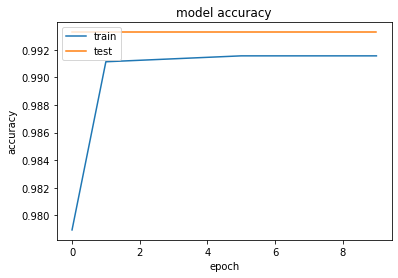

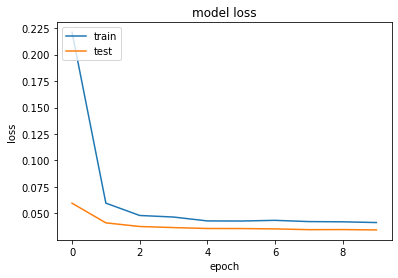

In [37]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
accr = model.evaluate(X_test.toarray(),Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

82/82 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9904
Test set
  Loss: 0.044
  Accuracy: 0.990


In [39]:
# def sample_predict(sample_pred_text):
#   new_sms = [sample_pred_text]
#   seq = tokenizer.texts_to_sequences(new_sms)
#   padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
#   predictions = model.predict(padded)
  
#   return np.argmax(predictions)

def sample_predict(sample_pred_text):
  new_sms = [sample_pred_text]
  seq = vectorizer.transform(new_sms)
  # padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
  predictions = model.predict(seq)
  
  return np.argmax(predictions)

In [40]:
sample_predict("Model Train hogaya")

1

In [41]:
import pickle
filename = '_vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))

In [42]:
model.save("_SMS_classifier_.h5")

In [48]:
# import json
# with open( 'word_dict.json' , 'w' ) as file:
# 	json.dump( vectorizer.vocabulary_ , file )
filename2 = '_vocabulary.pkl'
pickle.dump(vectorizer.vocabulary_, open(filename2, 'wb'))

In [49]:
converter = tf.lite.TFLiteConverter.from_keras_model(model )

In [50]:
tfmodel = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpdbbjj9o8/assets


In [51]:
open ("_SMS_classifier__android.tflite" , "wb") .write(tfmodel)

501780